In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pywaffle import Waffle


# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)
# see numbers after decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')
require('ggplot2')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
df = pd.read_csv('FAOSTAT_data_en_3-22-2023.csv')
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2012,2012,ha,13490.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2013,2013,ha,14114.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2014,2014,ha,13703.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2015,2015,ha,14676.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.00,"Almonds, in shell",2016,2016,ha,19481.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196890,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2017,2017,tonnes,38715.00,A,Official figure
196891,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2018,2018,tonnes,45000.00,E,Estimated value
196892,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2019,2019,tonnes,94685.00,A,Official figure
196893,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,111.00,Wheat,2020,2020,tonnes,212530.00,A,Official figure


In [5]:
df.columns = df.columns.str.replace("Area", "Country")
df.columns

Index(['Domain Code', 'Domain', 'Country Code (M49)', 'Country',
       'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [6]:
df.Item = df.Item.str.replace(",", "")

In [7]:
Peru = df[df.Country == 'Peru'].reset_index(drop=True)
Peru.head(2)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1371.00,Almonds in shell,2012,2012,ha,0.00,M,"Missing value (data cannot exist, not applicable)"
1,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1371.00,Almonds in shell,2013,2013,ha,0.00,M,"Missing value (data cannot exist, not applicable)"


In [8]:
product = Peru[Peru.Element == "Production"]
product.head(2)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
10,QCL,Crops and livestock products,604,Peru,5510,Production,1371.00,Almonds in shell,2012,2012,tonnes,0.00,M,"Missing value (data cannot exist, not applicable)"
11,QCL,Crops and livestock products,604,Peru,5510,Production,1371.00,Almonds in shell,2013,2013,tonnes,0.00,M,"Missing value (data cannot exist, not applicable)"


In [9]:
product['Year'] = pd.to_datetime(product['Year'], format="%Y")

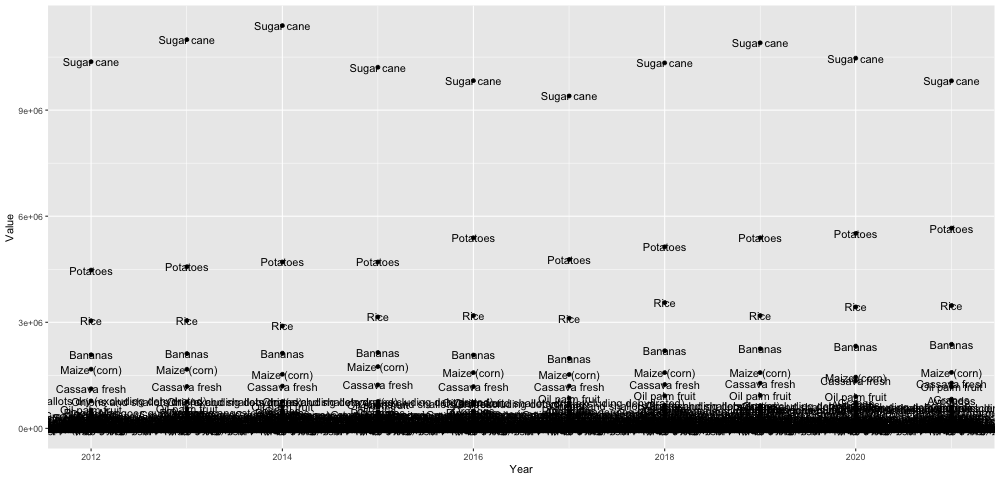

In [10]:
%%R -i product -w 1000

#Major crops of the country: sugarcane, potatoes, rice, bananas, Maize (corn), Cassava fresh

ggplot(product) + aes(x=Year, y=Value, label=Item) +
    geom_point() + geom_text()

In [11]:
peru_products12 = product[product.Year.dt.year == 2012].reset_index(drop=True)
peru_products12.sort_values(by='Value', ascending=False).head(2)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
89,QCL,Crops and livestock products,604,Peru,5510,Production,1802.00,Sugar cane,2012,2012-01-01,tonnes,10368866.00,A,Official figure
75,QCL,Crops and livestock products,604,Peru,5510,Production,1510.00,Potatoes,2012,2012-01-01,tonnes,4474712.65,A,Official figure


In [12]:
peru_products21 = product[product.Year.dt.year == 2021].reset_index(drop=True)
peru_products21.sort_values(by='Value', ascending=False).head()

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
89,QCL,Crops and livestock products,604,Peru,5510,Production,1802.00,Sugar cane,2021,2021-01-01,tonnes,9827807.68,A,Official figure
75,QCL,Crops and livestock products,604,Peru,5510,Production,1510.00,Potatoes,2021,2021-01-01,tonnes,5661443.00,A,Official figure
79,QCL,Crops and livestock products,604,Peru,5510,Production,113.00,Rice,2021,2021-01-01,tonnes,3474307.00,A,Official figure
7,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2021,2021-01-01,tonnes,2378045.18,A,Official figure
48,QCL,Crops and livestock products,604,Peru,5510,Production,112.00,Maize (corn),2021,2021-01-01,tonnes,1582135.00,A,Official figure


In [13]:
peru_top_crops_vs_blue_product = Peru.query("Element == 'Production'  &Item == ['Blueberries', 'Sugar cane', 'Potatoes', 'Rice', 'Bananas', 'Maize (corn)']")
peru_top_crops_vs_blue_product.reset_index(drop=True)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2012,2012,tonnes,2082089.30,A,Official figure
1,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2013,2013,tonnes,2114853.00,A,Official figure
2,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2014,2014,tonnes,2125839.00,A,Official figure
3,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2015,2015,tonnes,2145361.00,A,Official figure
4,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2016,2016,tonnes,2073994.70,A,Official figure
5,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2017,2017,tonnes,1981047.00,A,Official figure
6,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2018,2018,tonnes,2194857.56,A,Official figure
7,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2019,2019,tonnes,2252171.50,A,Official figure
8,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2020,2020,tonnes,2326085.08,A,Official figure
9,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2021,2021,tonnes,2378045.18,A,Official figure


In [14]:
peru_top_crops_vs_blue_product['Year_dt'] = pd.to_datetime(peru_top_crops_vs_blue_product['Year'], format="%Y")
peru_top_crops_vs_blue_product.head(1)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Year_dt
150,QCL,Crops and livestock products,604,Peru,5510,Production,1312.00,Bananas,2012,2012,tonnes,2082089.30,A,Official figure,2012-01-01


In [16]:
peru_top_crops_vs_blue_product.to_csv('for_raw_peru_topcrop_product.csv', index=False)

In [17]:
peru_blue = Peru[Peru.Item == "Blueberries"].reset_index(drop=True)
peru_blue

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2012,2012,ha,400.00,A,Official figure
1,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2013,2013,ha,650.00,A,Official figure
2,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2014,2014,ha,300.00,A,Official figure
3,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2015,2015,ha,1158.00,A,Official figure
4,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2016,2016,ha,1945.00,A,Official figure
5,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2017,2017,ha,4134.00,A,Official figure
6,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2018,2018,ha,6011.00,A,Official figure
7,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2019,2019,ha,8490.00,I,Imputed value
8,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2020,2020,ha,9110.00,I,Imputed value
9,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2021,2021,ha,16041.00,E,Estimated value


In [172]:
peru_blue.groupby(['Year', "Element"]).Value.sum().to_csv('peru_blue_all_years.csv')

In [19]:
peru_blue.head(20)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2012,2012,ha,400.00,A,Official figure
1,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2013,2013,ha,650.00,A,Official figure
2,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2014,2014,ha,300.00,A,Official figure
3,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2015,2015,ha,1158.00,A,Official figure
4,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2016,2016,ha,1945.00,A,Official figure
5,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2017,2017,ha,4134.00,A,Official figure
6,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2018,2018,ha,6011.00,A,Official figure
7,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2019,2019,ha,8490.00,I,Imputed value
8,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2020,2020,ha,9110.00,I,Imputed value
9,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2021,2021,ha,16041.00,E,Estimated value


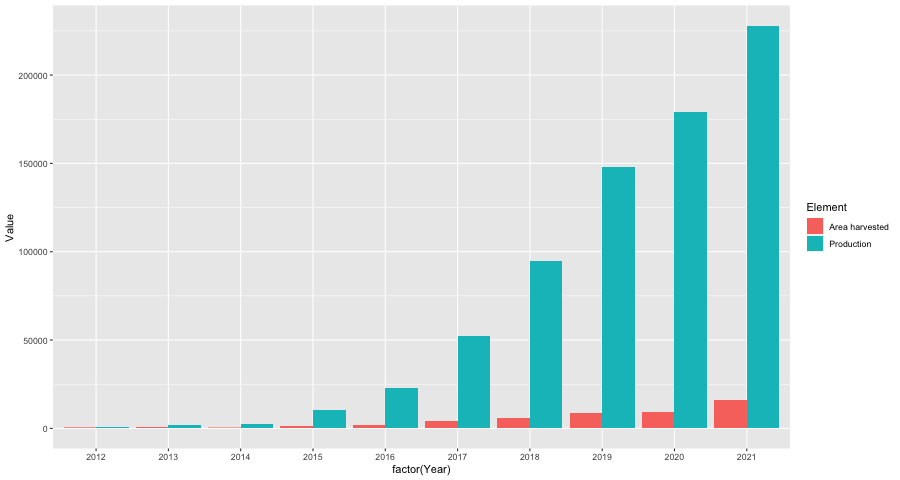

In [20]:
%%R -i peru_blue -w 900

ggplot(peru_blue) + aes(x=factor(Year), y=Value, fill = Element) +
    geom_col(position = "dodge")

In [21]:
peru_sugar = Peru[Peru.Item == "Sugar cane"].reset_index(drop=True)
peru_sugar.head(2)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1802.00,Sugar cane,2012,2012,ha,81126.00,A,Official figure
1,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1802.00,Sugar cane,2013,2013,ha,82205.00,A,Official figure


In [22]:
peru_potato = Peru[Peru.Item == "Potatoes"].reset_index(drop=True)
peru_potato.head(2)

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1510.00,Potatoes,2012,2012,ha,312227.00,A,Official figure
1,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1510.00,Potatoes,2013,2013,ha,317132.00,A,Official figure


In [146]:
peru_top_12_21 = Peru.query("Item == ['Sugar cane', 'Potatoes', 'Blueberries', 'Maize (corn)', 'Rice', 'Bananas'] & Year == [2012, 2021]")
peru_top_12_21 = peru_top_12_21.reset_index(drop=True)
peru_top_12_21[peru_top_12_21.Item == "Blueberries"]

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
4,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2012,2012,ha,400.00,A,Official figure
5,QCL,Crops and livestock products,604,Peru,5312,Area harvested,1355.01,Blueberries,2021,2021,ha,16041.00,E,Estimated value
6,QCL,Crops and livestock products,604,Peru,5510,Production,1355.01,Blueberries,2012,2012,tonnes,560.00,A,Official figure
7,QCL,Crops and livestock products,604,Peru,5510,Production,1355.01,Blueberries,2021,2021,tonnes,227971.00,A,Official figure


In [33]:
peru_top_12_21.groupby(['Year', 'Element', 'Item']).Value.sum().to_csv('top_crop_12_21.csv')

In [34]:
plot = pd.read_csv('top_crop_12_21.csv')
plot

,Year,Element,Item,Value
0,2012,Area harvested,Bananas,151560.00
1,2012,Area harvested,Blueberries,400.00
2,2012,Area harvested,Maize (corn),505944.00
3,2012,Area harvested,Potatoes,312227.00
4,2012,Area harvested,Rice,390919.00
5,2012,Area harvested,Sugar cane,81126.00
6,2012,Production,Bananas,2082089.30
7,2012,Production,Blueberries,560.00
8,2012,Production,Maize (corn),1673873.64
9,2012,Production,Potatoes,4474712.65


In [82]:
area = plot[plot.Element == 'Area harvested'].reset_index(drop=True)
area = area.pivot(index='Year', columns='Item', values='Value').reset_index()
area

Item,Year,Bananas,Blueberries,Maize (corn),Potatoes,Rice,Sugar cane
0,2012,151560.00,400.00,505944.00,312227.00,390919.00,81126.00
1,2021,174100.00,16041.00,442013.00,330604.00,417813.00,84852.00


In [161]:
area1 = plot[plot.Item == 'Blueberries'].reset_index(drop=True)
area1 = area1.pivot(index='Year', columns='Element', values='Value').reset_index()
area1

Element,Year,Area harvested,Production
0,2012,400.00,560.00
1,2021,16041.00,227971.00


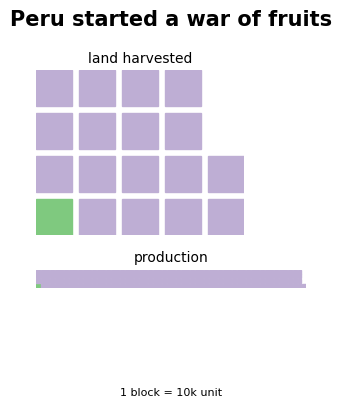

In [177]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        211: {
            'values': area1['Area harvested'] / 1000,  # Convert actual number to a reasonable block number
#             'labels': [f"{k} ({v/10000}) million ton" for k, v in area['Bananas'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'land harvested', 'loc': 'center', 'fontsize': 10}
        },
        212: {
            'values': area1['Production'] / 1000,
#             'labels': [f"{k} ({v/10000}) million ton" for k, v in area['Blueberries'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'production', 'loc': 'center', 'fontsize': 10}
        },
    },
    rows=4,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(3, 4)
)

fig.suptitle('Peru started a war of fruits', fontsize=15, fontweight='bold')
fig.supxlabel('1 block = 10k unit', fontsize=8, ha='center')
fig.set_facecolor('#ffffff')
#fig.savefig("blue_land_product.svg")

In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=[12, 22, 20, 4],
    block_arranging_style='snake'
)


In [ ]:
 212: 

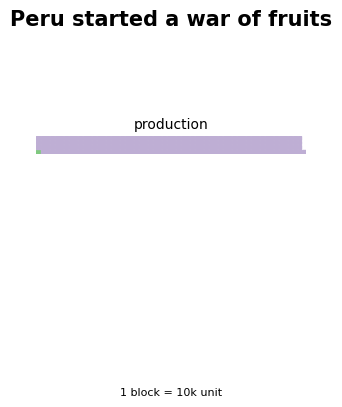

In [170]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        211: {
            'values': area1['Production'] / 1000,
#             'labels': [f"{k} ({v/10000}) million ton" for k, v in area['Blueberries'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'production', 'loc': 'center', 'fontsize': 10}
        },
    },
    rows=4,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(3, 4)
)

fig.suptitle('Peru started a war of fruits', fontsize=15, fontweight='bold')
fig.supxlabel('1 block = 10k unit', fontsize=8, ha='center')
fig.set_facecolor('#ffffff')
#fig.savefig("blue_land_product.svg")

In [182]:
new_plot = pd.read_csv('peru_blue_all_years.csv')
new_plot = new_plot.pivot(index='Year', columns='Element', values='Value').reset_index()
new_p = new_plot.drop(labels=[1, 2, 4, 5, 7, 8])
new_p

Element,Year,Area harvested,Production
0,2012,400.00,560.00
3,2015,1158.00,10585.00
6,2018,6011.00,94805.00
9,2021,16041.00,227971.00


In [190]:
new_plot

Element,Year,Area harvested,Production
0,2012,400.00,560.00
1,2013,650.00,1668.00
2,2014,300.00,2500.00
3,2015,1158.00,10585.00
4,2016,1945.00,22978.29
5,2017,4134.00,52301.00
6,2018,6011.00,94805.00
7,2019,8490.00,147900.00
8,2020,9110.00,179305.00
9,2021,16041.00,227971.00


In [191]:
new_plot['product_harvest_ratio'] = new_plot['Production'] / new_plot['Area harvested']
new_plot

Element,Year,Area harvested,Production,product_harvest_ratio
0,2012,400.00,560.00,1.40
1,2013,650.00,1668.00,2.57
2,2014,300.00,2500.00,8.33
3,2015,1158.00,10585.00,9.14
4,2016,1945.00,22978.29,11.81
5,2017,4134.00,52301.00,12.65
6,2018,6011.00,94805.00,15.77
7,2019,8490.00,147900.00,17.42
8,2020,9110.00,179305.00,19.68
9,2021,16041.00,227971.00,14.21


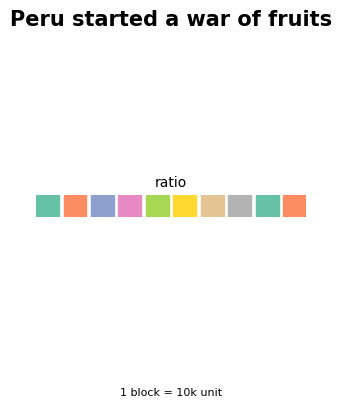

In [196]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': new_plot['product_harvest_ratio'] / 10000,  # Convert actual number to a reasonable block number
#             'labels': [f"{k} ({v/10000}) million ton" for k, v in area['Bananas'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'ratio', 'loc': 'center', 'fontsize': 10}
        },
#         212: {
#             'values': new_p['Production'] / 10000,
# #             'labels': [f"{k} ({v/10000}) million ton" for k, v in area['Blueberries'].items()],
# #             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
#             'title': {'label': 'production', 'loc': 'center', 'fontsize': 10}
#         },
    },
    rows=1,  # Outside parameter applied to all subplots, same as below
    cmap_name="Set2",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(3, 4)
)

fig.suptitle('Peru started a war of fruits', fontsize=15, fontweight='bold')
fig.supxlabel('1 block = 10k unit', fontsize=8, ha='center')
fig.set_facecolor('#ffffff')
#fig.savefig("blue_land_product.svg")

In [254]:
%%R -i new_plot -w 600 -h 600

ggplot(new_plot) + aes(x=factor(Year), y=product_harvest_ratio) + 
    geom_image(image = "https://www.freepnglogos.com/uploads/blueberries-png/blueberries-blueberry-sch-boden-spies-7.png", size=0.1) + 
    theme_bw()

ggsave('land_to_product_ratio.pdf')

Saving 8.33 x 8.33 in image


In [224]:
%%R

require('ggimage')

R[write to console]: Loading required package: ggimage



In [223]:
%%R

install.packages("ggimage")

R[write to console]: Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)



--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (PR) [https]
 9: Brazil (RJ) [https]
10: Brazil (SP 1) [https]
11: Brazil (SP 2) [https]
12: Bulgaria [https]
13: Canada (MB) [https]
14: Canada (ON 3) [https]
15: Chile (Santiago) [https]
16: China (Beijing 2) [https]
17: China (Beijing 3) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Guangzhou) [https]
21: China (Jinan) [https]
22: China (Lanzhou) [https]
23: China (Nanjing) [https]
24: China (Shanghai 2) [https]
25: China (Shenzhen) [https]
26: Colombia (Cali) [https]
27: Costa Rica [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseil

R[write to console]: also installing the dependencies ‘gridGraphics’, ‘yulab.utils’, ‘ggfun’, ‘ggplotify’, ‘magick’


R[write to console]: trying URL 'https://ftp.osuosl.org/pub/cran/src/contrib/gridGraphics_0.5-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 69207 bytes (67 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

R[write to console]: downloaded 71 KB


* installing *source* package ‘gridGraphics’ ...
** package ‘gridGraphics’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (gridGraphics)
* installing *source* package ‘yulab.utils’ ...
** packa

Found pkg-config cflags and libs!
Using PKG_CFLAGS=-Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7
Using PKG_LIBS=-L/opt/homebrew/Cellar/imagemagick/7.1.0-57/lib -lMagick++-7.Q16HDRI -lMagickWand-7.Q16HDRI -lMagickCore-7.Q16HDRI


** libs


clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c RcppExports.cpp -o RcppExports.o


In file included from RcppExports.cpp:4:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c animation.cpp -o animation.o


In file included from animation.cpp:1:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/S

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c attributes.cpp -o attributes.o


In file included from attributes.cpp:6:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c base.cpp -o base.o


In file included from base.cpp:6:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/M

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c color.cpp -o color.o


In file included from color.cpp:6:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c composite.cpp -o composite.o


In file included from composite.cpp:1:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/S

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c config.cc -o config.o


In file included from config.cc:1:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c convolve.cpp -o convolve.o


In file included from convolve.cpp:6:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SD

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c device.cpp -o device.o


In file included from device.cpp:9:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c edges.cpp -o edges.o


In file included from edges.cpp:6:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c edit.cpp -o edit.o


In file included from edit.cpp:6:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/M

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c fonts.cpp -o fonts.o
clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -

In file included from options.cpp:6:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDK

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c properties.cpp -o properties.o


In file included from properties.cpp:1:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c resize.cpp -o resize.o


In file included from resize.cpp:1:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c segment.cpp -o segment.o


In file included from segment.cpp:1:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDK

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -Xpreprocessor -fopenmp -DMAGICKCORE_HDRI_ENABLE=1 -DMAGICKCORE_QUANTUM_DEPTH=16 -I/opt/homebrew/Cellar/imagemagick/7.1.0-57/include/ImageMagick-7 -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c transformations.cpp -o transformations.o


In file included from transformations.cpp:6:
In file included from ./magick_types.h:2:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineT

clang++ -std=gnu++14 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib -L/opt/homebrew/lib -o magick.so RcppExports.o animation.o attributes.o base.o color.o composite.o config.o convolve.o device.o edges.o edit.o fonts.o options.o properties.o resize.o segment.o transformations.o -L/opt/homebrew/Cellar/imagemagick/7.1.0-57/lib -lMagick++-7.Q16HDRI -lMagickWand-7.Q16HDRI -lMagickCore-7.Q16HDRI -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -lR -lintl -Wl,-framework -Wl,CoreFoundation


** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (magick)
* installing *source* package ‘ggplotify’ ...
** package ‘ggplotify’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplotify)
* installing *source* package ‘ggimage’ ...
** package ‘ggimage’ successfully unpacked 

In [118]:
product = plot[plot.Element == 'Production'].reset_index(drop=True)
product = product.pivot(index='Year', columns='Item', values='Value').reset_index()
product

Item,Year,Bananas,Blueberries,Maize (corn),Potatoes,Rice,Sugar cane
0,2012,2082089.30,560.00,1673873.64,4474712.65,3043330.45,10368866.00
1,2021,2378045.18,227971.00,1582135.00,5661443.00,3474307.00,9827807.68


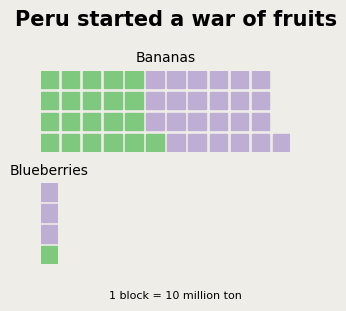

In [136]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        211: {
            'values': product['Bananas'] / 100000,  # Convert actual number to a reasonable block number
#             'labels': [f"{k} ({v/10000}) million ton" for k, v in area['Bananas'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Bananas', 'loc': 'center', 'fontsize': 10}
        },
        212: {
            'values': product['Blueberries'] / 100000,
#             'labels': [f"{k} ({v/10000}) million ton" for k, v in area['Blueberries'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'Blueberries', 'loc': 'center', 'fontsize': 10}
        },
#         613: {
#             'values': product['Maize (corn)'] / 10000,  # Convert actual number to a reasonable block number
# #             'labels': [f"{k} ({v/100000}) million ton" for k, v in area['Maize (corn)'].items()],
# #             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
#             'title': {'label': 'Maize (corn)', 'loc': 'center', 'fontsize': 10}
#         },
#         614: {
#             'values': product['Potatoes'] / 10000,
# #             'labels': [f"{k} ({v/100000}) million ton" for k, v in area['Potatoes'].items()],
# #             'legend': {'loc': 'upper right', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
#             'title': {'label': 'Potatoes', 'loc': 'center', 'fontsize': 10}
#         },
#         615: {
#             'values': product['Rice'] / 10000,  # Convert actual number to a reasonable block number
# #             'labels': [f"{k} ({v/100000}) million ton" for k, v in area['Rice'].items()],
# #             'legend': {'loc': 'upper right', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
#             'title': {'label': 'Rice', 'loc': 'center', 'fontsize': 10}
#         },
#         616: {
#             'values': product['Sugar cane'] / 10000,
# #              'labels': [f"{k} ({v/100000}) tonne" for k, v in area['Sugar cane'].items()],
# #             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.5, 1), 'fontsize': 8},
#             'title': {'label': 'Sugar cane', 'loc': 'center', 'fontsize': 10}
#         },
    },
    rows=4,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(3, 3)
)

fig.suptitle('Peru started a war of fruits', fontsize=15, fontweight='bold')
fig.supxlabel('1 block = 10 million ton', fontsize=8, ha='center')
fig.set_facecolor('#EEEDE7')
# fig.savefig("fdgnkdfg.svg")

In [38]:
sugar_cane = plot[plot.Item == "Sugar cane"]
sugar_cane

,Year,Element,Item,Value
5,2012,Area harvested,Sugar cane,81126.00
11,2012,Production,Sugar cane,10368866.00
17,2021,Area harvested,Sugar cane,84852.00
23,2021,Production,Sugar cane,9827807.68


In [54]:
sugar_cane = sugar_cane.pivot(index='Year', columns='Element', values='Value').reset_index()
sugar_cane

Element,Year,Area harvested,Production
0,2012,81126.00,10368866.00
1,2021,84852.00,9827807.68


In [ ]:
country	China	India	Indonesia
consumption	170736795.90	114089085.00	39242236.00
product	212843000	195425000	54415294

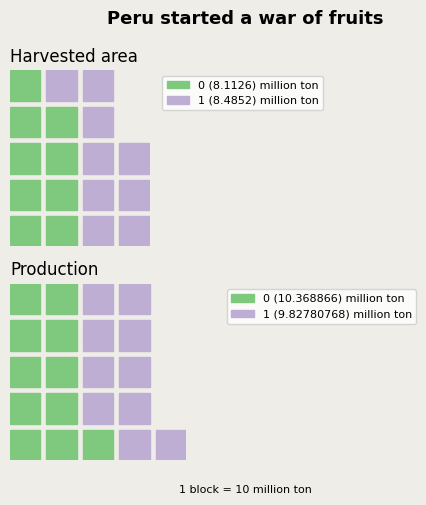

In [61]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        211: {
            'values': sugar_cane['Area harvested'] / 10000,  # Convert actual number to a reasonable block number
            'labels': [f"{k} ({v/10000}) million ton" for k, v in sugar_cane['Area harvested'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Harvested area', 'loc': 'left', 'fontsize': 12}
        },
        212: {
            'values': sugar_cane['Production'] / 1000000,
            'labels': [f"{k} ({v/1000000}) million ton" for k, v in sugar_cane['Production'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'Production', 'loc': 'left', 'fontsize': 12}
        },
#         313: {
#             'values': data['Indonesia'] / 10000000,
#             'labels': [f"{k} ({v/1000000}) million ton" for k, v in data['Indonesia'].items()],
#             'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
#             'title': {'label': 'Indonesia', 'loc': 'left', 'fontsize': 12}
#         },
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(5, 5)
)

fig.suptitle('Peru started a war of fruits', fontsize=13, fontweight='bold')
fig.supxlabel('1 block = 10 million ton', fontsize=8, ha='center')
fig.set_facecolor('#EEEDE7')
#fig.savefig("fdgnkdfg.svg")